## Observations and Insights 

In [1]:
# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. 
# Include these observations at the top of notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, encoding="ISO-8859-1")
study_results = pd.read_csv(study_results_path, encoding="ISO-8859-1")

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
#df.count()
len(merge_df["Mouse ID"].unique())

249

In [4]:
merge_df["Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [5]:
# Use df.loc to narrow data
# new_df = df.loc[:,["","",""]]
narrow_mice = merge_df.loc[:,["Mouse ID","Timepoint"]]
narrow_mice

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# duplicateRowsDF = dfObj[dfObj.duplicated(['Age'])]
duplicate_mice = narrow_mice[narrow_mice.duplicated(["Mouse ID"])]
duplicate_mice.count()["Mouse ID"]

1644

In [7]:
# Display the data table for preview
duplicate_mice

,Mouse ID,Timepoint
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [8]:
print(duplicate_mice)

     Mouse ID  Timepoint
1        k403          5
2        k403         10
3        k403         15
4        k403         20
5        k403         25
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1644 rows x 2 columns]


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

In [10]:
# Find the duplicate mouse
# df = duplicate_mice.duplicated(subset=["Mouse ID"], "Mouse ID")
# use the .loc method you can locate the Mouse ID column
# check with .unique method to check your duplicated row has dropped from original count
problem_mouse = duplicate_mice.loc[duplicate_mice.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
problem_mouse[0]

'g989'

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# duplicateRowsDF = dfObj[dfObj.duplicated(['Age'])]
duplicate_mice = narrow_mice[narrow_mice.duplicated(["Mouse ID"])]
duplicate_mice.count()["Mouse ID"]

1644

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop all rows with missing information
# study_data = duplicate_mice.loc[duplicate_mice.duplicated(subset=['Mouse ID'])]
# study_data

# clean_df = duplicate_mice[duplicate_mice["Mouse ID"] == 'g989']
# clean_df = clean_df.drop_duplicates
clean_df = merge_df[merge_df["Mouse ID"].isin(problem_mouse)==False]
#clean_df = clean_df[clean_df["Mouse ID"] != problem_mouse[0]]
clean_df.head()


# Checking the number of mice in the clean DataFrame.
# Verify clean up
# clean_df.count()[0]
# clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# The mean method averages the series
#drug_regimen = merge_df["Drug Regimen"].unique()
#drug_regimen

# data_file_df["Drug Regimen"].mean()
# data_file_df["Tumor Volume (mm3)"].mean()
# Find average/mean

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# This method produces everything in a single groupby function

means = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stds = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stds,
                              "Tumor Volume Std. Err.":sems}) 
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#counts = clean_df.groupby('Drug Regimen').count()['Mouse ID']
#counts
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


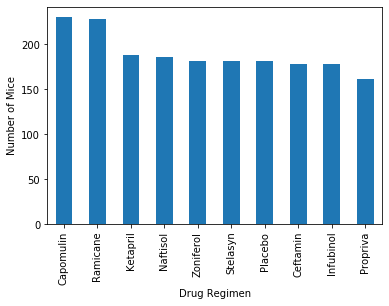

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Use DataFrame.plot() in order to create a bar chart of the data
# Create a list indicating where to write x labels and set figure size to adjust for space
counts = merge_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()  

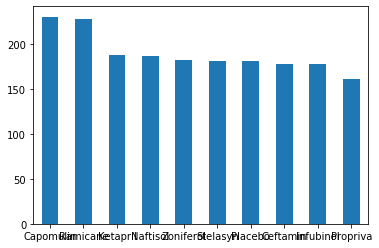

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
counts_2 = merge_df['Drug Regimen'].value_counts()
bar = counts_2.plot.bar(rot=0)
bar

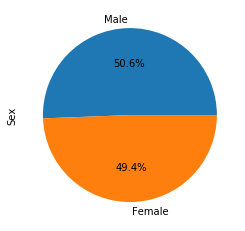

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# The values of each section of the pie chart
gender = merge_df['Sex'].value_counts()
gender.plot(kind="pie",autopct='%1.1f%%')

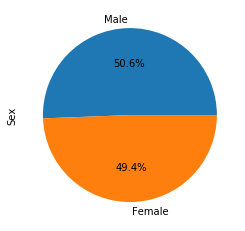

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merge_df['Sex'].value_counts()
plt.pie(gender.values,labels=gender.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
#mouse_df = pd.DataFrame ({"Last Timepoint": mouse_group["Timepoint"].max()})
#fin_tumor_vol = pd.merge(mouse_df, merge_df, left_on=["Mouse ID, "Last Timepoint"], right_on=["Mouse ID", "Last Timepoint]
#fin_tumor_vol = fin_tumor_vol[["Mouse ID", "Last Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
#fin_tumor_vol
# max_df = clean_df.groupby('mouse_id')['timepoint'].max().reset_index()

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |
                               (clean_df["Drug Regimen"] == "RamiCane")|
                               (clean_df["Drug Regimen"] == "Infubinol")|
                               (clean_df["Drug Regimen"] == "Ceftmain")]

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = four_treatments.groupby(["Mouse ID"])['Timepoint'].max()
max_mouse.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = clean_df.merge(max_mouse, on=("Mouse ID", "Timepoint"))
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3
5,y793,Capomulin,Male,17,17,45,31.896238,2
6,r554,Capomulin,Female,8,17,45,32.377357,3
7,m957,Capomulin,Female,3,19,45,33.329098,1
8,t565,Capomulin,Female,20,17,45,34.455298,0
9,i738,Capomulin,Female,23,20,45,37.311846,2


In [28]:
max_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = max_merge["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [0,0,0,0]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol.quantile([.25,.50,.75])

lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(treatments)):
    
    tumor_vol_data[i] = max_merge.loc[(max_merge["Drug Regimen"] == treatments[i])].sum()
    
# add subset 
tumor_vol_data[0] = tumor_vol_data[0]["Tumor Volume (mm3)"]
tumor_vol_data[1] = tumor_vol_data[1]["Tumor Volume (mm3)"]
tumor_vol_data[2] = tumor_vol_data[2]["Tumor Volume (mm3)"]
tumor_vol_data[3] = tumor_vol_data[3]["Tumor Volume (mm3)"]

subset_df = pd.DataFrame({
    "Drug Regimen" : treatments, 
    "Total Volume" : tumor_vol_data
    })
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 *iqr)
subset_df

,Drug Regimen,Total Volume
0,Capomulin,916.689193
1,Ramicane,0.000000
2,Infubinol,1454.456145
3,Ceftamin,0.000000


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = clean_df.loc[clean_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 *iqr)

subset_df_2 = pd.DataFrame({
    "Drug Regimen" : treatment_list, 
    "Total Volume" : tumor_vol_list
    })
subset_df_2

,Drug Regimen,Total Volume
0,Capomulin,10 45.000000 11 43.878496 12 37...
1,Ramicane,0 45.000000 1 38.825898 2 35.01...
2,Infubinol,454 45.000000 455 48.508468 456 51...
3,Ceftamin,484 45.000000 485 46.795257 486 47...


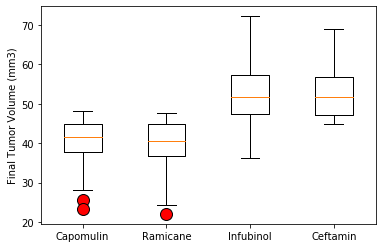

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [45]:
from scipy.stats import linregress
from sklearn import datasets

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# For the line plot you’ll want to pick a specific mouse out by ID
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [47]:
capomulin_mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "l509"]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


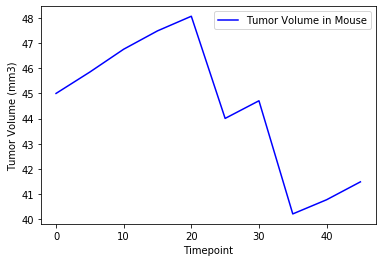

In [56]:
# Plot time point versus tumor volume for a mouse in a line chart
xvalues = capomulin_mouse["Timepoint"] 
yvalues = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(xvalues, yvalues, color="blue", label="Tumor Volume in Mouse")

# Create a legend for our chart
plt.legend()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the chart
plt.show()

In [57]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Start with clean_df then use the .loc method to find where the drug regimen is Capomulin.
capmulin_regimen = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capmulin_regimen

# For the scatter use groupby [Mouse ID] and average it.
vol_average = capmulin_regimen.groupby(["Mouse ID"]).mean()
vol_average

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


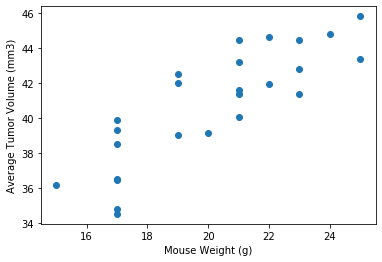

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter((vol_average["Weight (g)"]), (vol_average["Tumor Volume (mm3)"]))
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
#income = who_data.iloc[:,1]
#alcohol = who_data.iloc[:,8]
#correlation = st.pearsonr(income,alcohol)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

#The correlation between both factors is 0.61

In [54]:
#linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NameError: name 'x_values' is not defined